<h1 align="center">Give Me Some Credit</h1>

In [1]:
# libraries used in this project
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

## Data Import and Preparation

In [2]:
# import train data set
data = pd.read_csv("cs-training.csv")

In [3]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
# data clean process

# step #1: clean entries with na
data = data.dropna()

In [5]:
# Step #2 Remove outliers:
# analysis
z = np.abs(stats.zscore(data['RevolvingUtilizationOfUnsecuredLines']))
print(max(z))

z = np.abs(stats.zscore(data['age']))
print(max(z))

z = np.abs(stats.zscore(data['DebtRatio']))
print(max(z))

z = np.abs(stats.zscore(data['MonthlyIncome']))
print(max(z))

z = np.abs(stats.zscore(data['NumberOfOpenCreditLinesAndLoans']))
print(max(z))

197.25402986347004
3.5843596535794626
143.90544224221773
208.70074737870993
9.519292104231905


In [6]:
# metodology: remove entries with z-score larger than 3
def remove_outlier(data, variate):
    data['z_score_' + variate] = np.abs(stats.zscore(data[variate]))
    data = data[(data['z_score_' + variate] < 3)]
    data.drop(['z_score_' + variate], axis = 1, inplace = True)
    return data

In [7]:
data = remove_outlier(data, 'RevolvingUtilizationOfUnsecuredLines')
data = remove_outlier(data, 'age')
data = remove_outlier(data, 'DebtRatio')
data = remove_outlier(data, 'MonthlyIncome')
data = remove_outlier(data, 'NumberOfOpenCreditLinesAndLoans')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,117677.000000,117677.000000,117677.000000,117677.000000,117677.000000,117677.000000,117677.000000,117677.000000,117677.000000,117677.000000,117677.000000,117677.000000
mean,75020.677448,0.069682,0.451886,51.205792,0.383873,5.043923,6372.143469,8.528166,0.215709,1.032666,0.190904,0.850158
std,43271.133471,0.254612,8.101493,14.442396,3.535599,61.273749,4557.509855,4.710483,3.502742,1.080398,3.485201,1.146864
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37700.000000,0.000000,0.034949,40.000000,0.000000,0.141982,3416.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74974.000000,0.000000,0.177399,51.000000,0.000000,0.293122,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112449.000000,0.000000,0.581937,61.000000,0.000000,0.475656,8200.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,150000.000000,1.000000,771.000000,94.000000,98.000000,1299.000000,50000.000000,24.000000,98.000000,20.000000,98.000000,20.000000


## Analyze Model

In [9]:
# combine NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate together
num_of_past_due_times = data["NumberOfTime30-59DaysPastDueNotWorse"] + data["NumberOfTime60-89DaysPastDueNotWorse"] + data["NumberOfTimes90DaysLate"]
num_of_past_due_times.head()
data["total_num_of_times_pass_due"] = num_of_past_due_times

In [10]:
new_data = data.drop(["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"], axis = 1)
new_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,total_num_of_times_pass_due
0,1,1,0.766127,45,0.802982,9120.0,13,6,2.0,2
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,0
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,2
3,4,0,0.233810,30,0.036050,3300.0,5,0,0.0,0
5,6,0,0.213179,74,0.375607,3500.0,3,1,1.0,0


In [11]:
data.corr()["SeriousDlqin2yrs"][["total_num_of_times_pass_due","RevolvingUtilizationOfUnsecuredLines", "age", "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans", "NumberRealEstateLoansOrLines","NumberOfDependents"]]

total_num_of_times_pass_due             0.110655
RevolvingUtilizationOfUnsecuredLines    0.010082
age                                    -0.103008
DebtRatio                              -0.011295
MonthlyIncome                          -0.056130
NumberOfOpenCreditLinesAndLoans        -0.031488
NumberRealEstateLoansOrLines           -0.007595
NumberOfDependents                      0.047457
Name: SeriousDlqin2yrs, dtype: float64

Please note that the correlationship between these varaite and SeriousDlqin2yrs is not that useful. Please see
further interpretation for each individual variate below:

### Person experienced 90 days past due delinquency or worse 

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

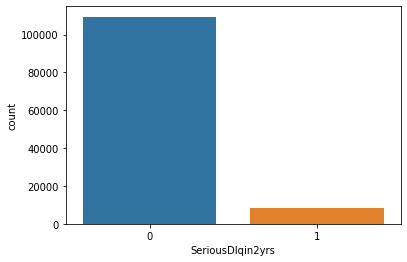

In [12]:
sns.countplot(x="SeriousDlqin2yrs", data=new_data)

In [13]:
new_data["SeriousDlqin2yrs"].sum() / len(new_data)

0.06968226586333778

**Interpretation**:

According to the dataset, about 6.9682% of customer experienced 90 days past due delinquency or worse.

### Revolving Utilization Of Unsecured Lines

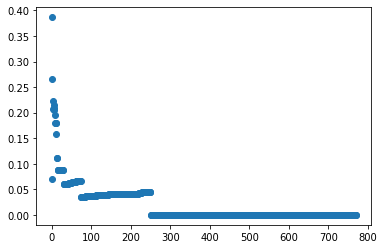

In [14]:
default_prop = []
ruul = []
for i in range(int(new_data["RevolvingUtilizationOfUnsecuredLines"].max())):
    temp_ = new_data.loc[new_data["RevolvingUtilizationOfUnsecuredLines"] >= i]
    ruul.append(i)
    default_prop.append(temp_["SeriousDlqin2yrs"].mean())
plt.plot(ruul, default_prop, 'o')

In [15]:
np.corrcoef(ruul,default_prop)

array([[ 1.       , -0.6723741],
       [-0.6723741,  1.       ]])

**Interpretation**

Along with the increasing of minimium Revolving Utilization Of Unsecured Lines can lead to decreasing probability of default.

It does *NOT* follow the intuition.


### Age

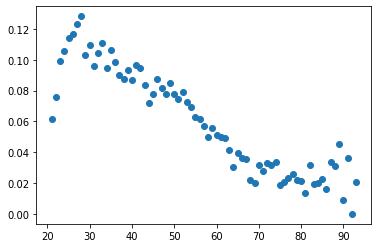

In [16]:
default_prop = []
age = []
for i in range(int(new_data["age"].max())):
    temp_ = new_data.loc[new_data["age"] == i]
    if(len(temp_) != 0):
        age.append(i)
        default_prop.append(temp_["SeriousDlqin2yrs"].mean())
plt.plot(age, default_prop, 'o')

In [17]:
np.corrcoef(age,default_prop)

array([[ 1.        , -0.92168188],
       [-0.92168188,  1.        ]])

**Interpretation**

As the age increases, the probability of default decrease.

### Debt Ratio

In [18]:
over_100 = new_data[(new_data["DebtRatio"] > 100)]
len(over_100) / len(new_data)

0.007299642241049653

**Interpretation**:

Note that about 0.72996% of users cannot pay their debt with their monthly income.

### Total Number of Times Pass Due

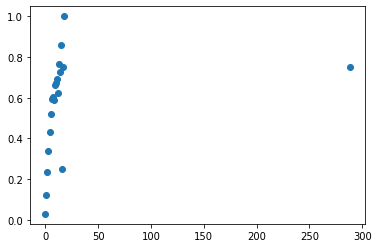

In [19]:
default_prop = []
times = []
for i in range(int(new_data["total_num_of_times_pass_due"].max())):
    temp_ = new_data.loc[new_data["total_num_of_times_pass_due"] == i]
    if (len(temp_) != 0):
        times.append(i)
        default_prop.append(temp_["SeriousDlqin2yrs"].mean())
plt.plot(times, default_prop, 'o')

In [20]:
np.corrcoef(times,default_prop)

array([[1.        , 0.24151352],
       [0.24151352, 1.        ]])

**Interpretation**

It is clear that as the number of times pass due, the probability of default increase and the relationship is strong.

### Number Of Dependents

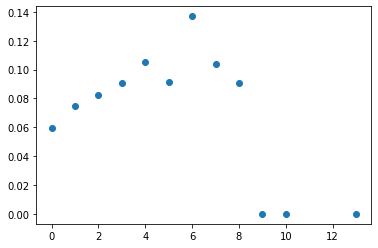

In [21]:
default_prop = []
dependents = []
for i in range(int(new_data["NumberOfDependents"].max())):
    temp_ = new_data.loc[new_data["NumberOfDependents"] == i]
    if (len(temp_) != 0):
        dependents.append(i)
        default_prop.append(temp_["SeriousDlqin2yrs"].mean())
plt.plot(dependents, default_prop, 'o')

In [22]:
np.corrcoef(dependents,default_prop)

array([[ 1.        , -0.54154854],
       [-0.54154854,  1.        ]])

**Interpretation**

As the number of dependents increase, the probability of default increases, and when the number of
dependents is over 6, it shows a negative relationship.

### Number Real Estate Loans Or Lines

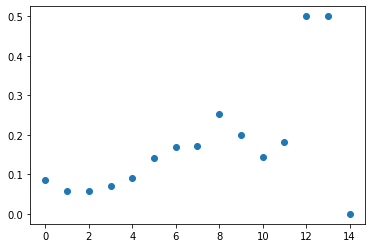

In [23]:
default_prop = []
loans = []
for i in range(int(new_data["NumberRealEstateLoansOrLines"].max())):
    temp_ = new_data.loc[new_data["NumberRealEstateLoansOrLines"] == i]
    if (len(temp_) != 0):
        loans.append(i)
        default_prop.append(temp_["SeriousDlqin2yrs"].mean())
plt.plot(loans, default_prop, 'o')

In [24]:
np.corrcoef(loans,default_prop)

array([[1.        , 0.54961303],
       [0.54961303, 1.        ]])

**Interpretatin**:

As the number of real estate loans and lines increase, the probability of default increases. The relationship is not strong.

### Number Of Open Credit Lines And Loans

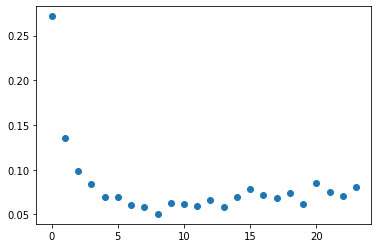

In [25]:
default_prop = []
open_credit = []
for i in range(int(new_data["NumberOfOpenCreditLinesAndLoans"].max())):
    temp_ = new_data.loc[new_data["NumberOfOpenCreditLinesAndLoans"] == i]
    if (len(temp_) != 0):
        open_credit.append(i)
        default_prop.append(temp_["SeriousDlqin2yrs"].mean())
plt.plot(open_credit, default_prop, 'o')

In [26]:
np.corrcoef(open_credit,default_prop)

array([[ 1.        , -0.40399162],
       [-0.40399162,  1.        ]])

**Interpretation**

As the number of Open Credit Lines And Loans decrease, the probability of default decrease

### interaction effects

In [27]:
new_data.corr()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,total_num_of_times_pass_due
Unnamed: 0,1.000000,0.004618,-0.000848,0.005320,-0.002948,0.000904,0.000701,-0.001723,0.000297,-0.002161
SeriousDlqin2yrs,0.004618,1.000000,0.010082,-0.103008,-0.011295,-0.056130,-0.031488,-0.007595,0.047457,0.110655
RevolvingUtilizationOfUnsecuredLines,-0.000848,0.010082,1.000000,-0.014347,0.005388,0.002509,-0.015006,-0.002956,0.000955,0.003539
age,0.005320,-0.103008,-0.014347,1.000000,-0.018213,0.103658,0.187220,0.066250,-0.204428,-0.047332
DebtRatio,-0.002948,-0.011295,0.005388,-0.018213,1.000000,-0.107618,-0.016254,-0.020545,0.001512,-0.003535
MonthlyIncome,0.000904,-0.056130,0.002509,0.103658,-0.107618,1.000000,0.258796,0.349851,0.178707,-0.033823
NumberOfOpenCreditLinesAndLoans,0.000701,-0.031488,-0.015006,0.187220,-0.016254,0.258796,1.000000,0.430925,0.047340,-0.064403
NumberRealEstateLoansOrLines,-0.001723,-0.007595,-0.002956,0.066250,-0.020545,0.349851,0.430925,1.000000,0.126261,-0.035223
NumberOfDependents,0.000297,0.047457,0.000955,-0.204428,0.001512,0.178707,0.047340,0.126261,1.000000,-0.001768
total_num_of_times_pass_due,-0.002161,0.110655,0.003539,-0.047332,-0.003535,-0.033823,-0.064403,-0.035223,-0.001768,1.000000
